# Homework 4 Nonlinear Optimization

## Group 11

- Yusuf Sina Öztürk- 2017402153
- Ahmet Tabakoğlu - 2017402072
- Ahmet Buğra Taksuk - 2017402168


In [1]:
# Importing necessary libraries
import timeit
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,6)})

We define the first function as `f1`.

In [2]:
def f1(x):
    return ((5*x[0]-x[1])**4 + (x[0]-2)**2 + x[0] - 2*x[1] + 12)

While we are evaluating methods, we are using gradients of the functions so here is the gradient function of `f1`

In [3]:
def grad_f1(x):
    grad = np.zeros(2)
    grad[0] = 2500* x[0]**3 - 1500* x[0]**2 * x[1] + 300 * x[0] * x[1]**2 + 2 * x[0] - 20 * x[1]**3 - 3
    grad[1] = -1 * 500 * x[0]**3 + 300 * x[0]**2 * x[1] - 60 * x[0] * x[1]**2 + 4 * x[1]**3 - 2
    return grad

Also, while we are evaluating Newton's Method, we have to calculate Hessian matrix of the function so here is the hessian matrix of `f1`

In [4]:
def hes_f1(x):
    der = np.zeros((2,2))
    der[0][0] = 300 * (5*x[0]-x[1])**2 + 2
    der[0][1] = -1 * 60 * (5*x[0]-x[1])**2
    der[1][0] = -1 * 60 * (5*x[0] - x[1]) **2 
    der[1][1] = 12 * (5*x[0]- x[1]) ** 2 
    return der

Rosenbrock’s curved valley function is defined as `f2`

In [5]:
def f2(x):
    return (100*(x[1]-x[0]**2)**2 + (1-x[0])**2)

Gradient of the Rosenbrock's curved valley function is `grad_f2`

In [6]:
def grad_f2(x):
    grad = np.zeros(2)
    grad[0] = -1 * 400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

Hessian matrix is also defined as `hes_f2` in order to use at Newton's Method.

In [7]:
def hes_f2(x):
    der = np.zeros((2,2))
    der[0][0] = -1*400 * (x[1] - x[0]**2) + 800 * x[0]**2 + 2
    der[0][1] = -1*400 * x[0]
    der[1][0] = -1*400 * x[0]
    der[1][1] = 200 
    return der

Euclidean distance calculator is also defined as `euc_distance` in order to use as a stopping condition in some methods.

In [8]:
def euc_distance(a,b):
    return np.sqrt((a[0]- b[0])**2 + (a[1]-b[1])**2)

Also while we are deciding step lenght we are using Exact Line Search Algorithm so here it is:

In [9]:
# Exact line search algorithm to decide on the steplength 

#f : function; 
#d : direction; 
#x : kth value of x;
#a and b : interval to search for best alpha;
#eps : step length for incrementian 

def exact_line(f,d,x,a,b,eps):
    min_val = 10000000000000000
    best_alpha = 0
    interval = np.arange(a,b,eps)
    for alpha in interval:
        if(f(x+(alpha*np.array(d)))<= min_val):
            min_val = f(x+(alpha*np.array(d)))
            best_alpha = alpha
    return best_alpha

Before, starting to evaluate methods, we want to visualize the functions.

Here is the visualization of first function in 3D graph:

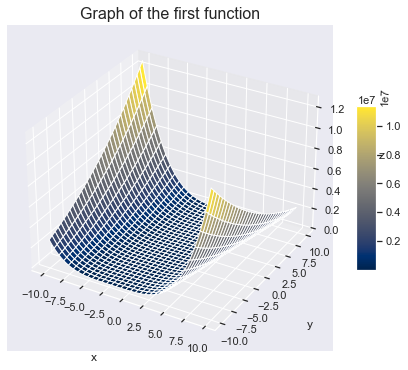

In [10]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')

x = np.arange(-10, 10, 0.3)
y = np.arange(-10, 10, 0.3)

X, Y = np.meshgrid(x, y)
Z = f1([X,Y])

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.title("Graph of the first function", size = 16)
plt.show()

Here is the visualization of the Rosenbrock's curved valley function in 3D graph:

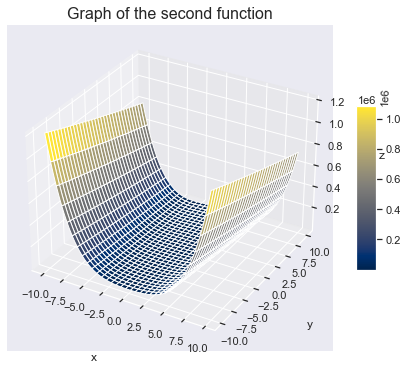

In [11]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')

x = np.arange(-10, 10, 0.3)
y = np.arange(-10, 10, 0.3)

X, Y = np.meshgrid(x, y)
Z = f2([X,Y])

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.title("Graph of the second function", size = 16)
plt.show()

## Steepest Descent Algorithm with Exact Line Search


In order to have a table after evaluating the methods, we need to initialize some of the variables:

In [ ]:
alpha_vals = [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration

Here is the Steepest Descent Method with exact line search algorithm named as `steepest_descent`

In [11]:
def steepest_descent(eps1,f,g,a,b,eps2,x0):
    x = np.zeros((10000,2))
    k = 0
    x[0] = x0 # initial points 
    while(True):
        x_vals.append(x[k])
        direction = [0,0]
        direction = -1 *  np.transpose( g(x[k])) / np.linalg.norm(g(x[k]))
        directions.append(direction)
        alpha = exact_line(f,direction,x[k],a,b,eps2)
        alpha_vals.append(alpha)
        x[k+1] = x[k] + alpha * direction
        x_next_vals.append(x[k+1])
        k = k+1
        #print("x",x[k])
        if(np.linalg.norm(g(x[k]))<=eps1 or k == 9999): # max iterations are set 
            break
    return x[k]  

### Parameter Set 1 - Function 1

- For exact line search (a,b,eps): (-10,10,0.0075). 
- For Steepest Descent Algorithm (eps) : (0.25)
- Initial point : [5,30].
- The zigzagging nature of steepest descent near the optimum point can be seen in this parameter set. It makes a lot of iterations but few improvements whereas the objective function value is close to the optimum one. 

In [14]:
all_result = []
output = steepest_descent(0.25, f1,grad_f1,-10,10,0.0075, [5.00, 30.00])
all_result.append(["Steepest Descent F1-P1 Output and Result" , [output, f1(output)]])
df_steep = pd.DataFrame(x_vals, columns = ["X1(k)" , "X2(k)"])
df_steep["f(X(k))"] = [f1(x) for x in x_vals]
df_steep["d(k)"] = directions
df_steep["alpha(k)"] = alpha_vals
df_steep["X(k+1)"] = x_next_vals

x [ 5.81391961 29.83741197]
x [ 5.8184872  29.83944595]
x [ 5.8151384  29.84315884]
x [ 5.81966832 29.8452754 ]
x [ 5.81629243 29.84896367]
x [ 5.82082125 29.85108259]
x [ 5.81743849 29.85476457]
x [ 5.82196983 29.8568781 ]
x [ 5.81858192 29.86055534]
x [ 5.82311608 29.8626628 ]
x [ 5.81972319 29.86633544]
x [ 5.82426019 29.86843679]
x [ 5.82086236 29.87210486]
x [ 5.82540218 29.87420009]
x [ 5.82199943 29.8778636 ]
x [ 5.82654206 29.87995275]
x [ 5.8231344  29.88361169]
x [ 5.82767982 29.88569477]
x [ 5.82426729 29.88934917]
x [ 5.82881547 29.89142618]
x [ 5.82539809 29.89507604]
x [ 5.82994903 29.89714701]
x [ 5.8265268  29.90079233]
x [ 5.83108049 29.90285727]
x [ 5.82765345 29.90649807]
x [ 5.83220985 29.90855699]
x [ 5.82877802 29.91219327]
x [ 5.83333713 29.9142462 ]
x [ 5.82990052 29.91787797]
x [ 5.83446232 29.91992492]
x [ 5.83102096 29.92355218]
x [ 5.83558544 29.92559316]
x [ 5.83213935 29.92921593]
x [ 5.83670648 29.93125096]
x [ 5.83325568 29.93486924]
x [ 5.83782545 29.93

ValueError: Length of values (20039) does not match length of index (20040)

In [15]:
df_steep.to_csv("Steepest_Descent_F1_P1_Results")
print("Results : ")
df_steep

Results : 


,X1(k),X2(k),f(X(k)),d(k)
0,-10.000000,-10.000000,2.560166e+06,"[0.9987524634012391, 0.049935126413741274]"
1,-0.017469,-9.500898,7.887668e+03,"[0.03598581797374679, 0.9993523006951854]"
2,0.328445,0.105376,2.049036e+01,"[0.896982872463238, 0.4420652966560466]"
3,0.400203,0.140741,2.665399e+01,"[-0.4411578982292569, 0.8974295007575495]"
4,0.394689,0.151959,2.567564e+01,"[0.6223053345462334, 0.782774597566439]"
...,...,...,...,...
20035,6.502162,33.291543,-2.743992e+01,"[-0.980914565971251, 0.19443923026342236]"
20036,6.497257,33.292515,-2.743994e+01,"[0.9810037541371346, -0.19398874804701535]"
20037,6.502162,33.291546,-2.743992e+01,"[-0.9809146345124363, 0.19443888448387492]"
20038,6.497258,33.292518,-2.743994e+01,"[0.9810036857410365, -0.19398909392669947]"


In [16]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 6.49725819 33.29251998]

f(x*) = -27.439943721189657




### Parameter Set 2 - Function 1
- For exact line search (a,b,eps): (-25,25,0.0075).  
- For Steepest Descent Algorithm (eps) : (0.05)
- Initial point : [10,10].
- Rather further point is chosen as initial point to test the global convergence. To guarantee that the interval for the exact line search has been expanded. 

In [21]:
alpha_vals = [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration

output = steepest_descent(0.25, f1,grad_f1,-25,25,0.0075, [10.00, 10.00])

all_result.append(["Steepest Descent F1-P2 Output and Result" , [output, f1(output)]])
df_steep = pd.DataFrame(x_vals, columns = ["X1(k)" , "X2(k)"])
df_steep["f(X(k))"] = [f1(x) for x in x_vals]
df_steep["d(k)"] = directions
df_steep["alpha(k)"] = alpha_vals
df_steep["X(k+1)"] = x_next_vals

x [ 2.22154215 11.55568306]
x [ 5.65762102 27.43824778]
x [ 5.35218839 27.50433228]
x [ 5.35629087 27.50719054]
x [ 5.35237422 27.5344102 ]
x [ 5.36480882 27.53568719]
x [ 5.36139577 27.5393411 ]
x [ 5.44304815 27.80193944]
x [ 5.41678055 27.81007968]
x [ 5.41240847 27.82179014]
x [ 5.41724772 27.8230478 ]
x [ 5.44498104 27.89003372]
x [ 5.43341735 27.8947804 ]
x [ 5.42929983 27.90658278]
x [ 5.43413468 27.90785723]
x [ 5.47416052 28.01832977]
x [ 5.45536047 28.02515313]
x [ 5.45948219 28.02798358]
x [ 5.45618741 28.04004154]
x [ 5.46097741 28.0414754 ]
x [ 5.85606046 30.27682982]
x [ 5.89791173 30.26943245]
x [ 5.90285733 30.270168  ]
x [ 5.90023149 30.27442299]
x [ 5.90496985 30.27601923]
x [ 5.90128099 30.27939448]
x [ 5.90599922 30.28104926]
x [ 5.90228475 30.28439631]
x [ 5.90699943 30.28606119]
x [ 5.90327658 30.28939891]
x [ 5.90799181 30.29106222]
x [ 5.90426431 30.29439475]
x [ 5.90898103 30.29605381]
x [ 5.90524973 30.29938209]
x [ 5.90996816 30.30103631]
x [ 5.90623326 30.30

In [22]:
df_steep.to_csv("Steepest_Descent_F1_P2_Results")
print("Results : ")
df_steep

Results : 


,X1(k),X2(k),f(X(k)),d(k),alpha(k),X(k+1)
0,10.000000,10.000000,2.560066e+06,"[-0.9805808819396271, 0.1961151038918299]",7.9325,"[2.221542154012684, 11.555683061622185]"
1,2.221542,11.555683,-8.800471e+00,"[0.21145100684925874, 0.9773885981033515]",16.2500,"[5.6576210153134685, 27.438247780803174]"
2,5.657621,27.438248,-2.331903e+01,"[-0.9773844046851242, 0.21147038912884536]",0.3125,"[5.35218838884843, 27.504332277406142]"
3,5.352188,27.504332,-2.611391e+01,"[0.8204960623801149, 0.5716521771311002]",0.0050,"[5.356290869161108, 27.50719053829234]"
4,5.356291,27.507191,-2.611600e+01,"[-0.14242346601718878, 0.9898058174852533]",0.0275,"[5.3523742238455005, 27.53441019827412]"
...,...,...,...,...,...,...
9994,6.497286,33.292662,-2.743994e+01,"[0.9809992930957313, -0.19401130623155804]",0.0050,"[6.502191366037782, 33.29169223350903]"
9995,6.502191,33.291692,-2.743992e+01,"[-0.9809190994713306, 0.19441635808839186]",0.0050,"[6.497286770539496, 33.29266431529966]"
9996,6.497287,33.292664,-2.743994e+01,"[0.9809992315891229, -0.19401161723347984]",0.0050,"[6.502191766698371, 33.29169425721331]"
9997,6.502192,33.291694,-2.743992e+01,"[-0.9809191611205296, 0.19441604703983817]",0.0050,"[6.497287170891839, 33.29266633744869]"


In [23]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 6.50219217 33.29169628]

f(x*) = -27.439917521067443




### Parameter Set 3 - Function 2
- For exact line search (a,b,eps): (-10,10,0.0075). 
- For Steepest Descent Algorithm (eps) : (0.25)
- Initial point : [-4,2].
- Recall that minimum point of the function is [1,1], after maximum iteration that we allow to the algorithm is reached, it almost find the global minimum. 


In [24]:
alpha_vals = [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration
output = steepest_descent(0.25, f2,grad_f2,-10,10,0.0075, [-4, 2])
all_result.append(["Steepest Descent F2-P3 Output and Result" , [output, f2(output)]])
df_steep = pd.DataFrame(x_vals, columns = ["X1(k)" , "X2(k)"])
df_steep["f(X(k))"] = [f2(x) for x in x_vals]
df_steep["d(k)"] = directions
df_steep["alpha(k)"] = alpha_vals
df_steep["X(k+1)"] = x_next_vals

x [1.64609987 2.70544755]
x [1.64120364 2.70646094]
x [1.64590963 2.70477166]
x [1.64101419 2.70578884]
x [1.64571976 2.7040984 ]
x [1.64082508 2.70511922]
x [1.64553024 2.70342763]
x [1.64063628 2.70445195]
x [1.64534103 2.70275922]
x [1.64044779 2.70378691]
x [1.64515214 2.70209306]
x [1.64025957 2.70312399]
x [1.64496352 2.70142904]
x [1.64007161 2.70246308]
x [1.64477518 2.70076705]
x [1.6398839  2.70180409]
x [1.64458708 2.700107  ]
x [1.63969642 2.70114694]
x [1.64439922 2.69944879]
x [1.63950916 2.70049152]
x [1.64421158 2.69879234]
x [1.63932209 2.69983777]
x [1.64402415 2.69813757]
x [1.63913522 2.69918561]
x [1.64383691 2.6974844 ]
x [1.63894852 2.69853497]
x [1.64364985 2.69683276]
x [1.63876199 2.69788578]
x [1.64346297 2.69618258]
x [1.63857562 2.69723797]
x [1.64327624 2.69553381]
x [1.63838939 2.6965915 ]
x [1.64308966 2.69488638]
x [1.6382033  2.69594629]
x [1.64290323 2.69424023]
x [1.63801733 2.6953023 ]
x [1.64271692 2.69359531]
x [1.63783148 2.69465948]
x [1.6425307

In [25]:
df_steep.to_csv("Steepest_Descent_F2_P3_Results")
print("Results : ")
df_steep

Results : 


,X1(k),X2(k),f(X(k)),d(k),alpha(k),X(k+1)
0,-4.000000,2.000000,19625.000000,"[0.9922846873181271, 0.12398023759441125]",5.690,"[1.6460998708407333, 2.7054475519122736]"
1,1.646100,2.705448,0.419207,"[-0.9792455546925932, 0.20267743735994748]",0.005,"[1.641203643066899, 2.7064609390991503]"
2,1.641204,2.706461,0.427813,"[0.9411977642391041, -0.33785613593852615]",0.005,"[1.6459096318884514, 2.7047716584193298]"
3,1.645910,2.704772,0.419003,"[-0.9790880190154496, 0.2034370935213212]",0.005,"[1.641014191793003, 2.7057888438870137]"
4,1.641014,2.705789,0.427440,"[0.9411138803751333, -0.33808972797951026]",0.005,"[1.6457197611952354, 2.704098395246988]"
...,...,...,...,...,...,...
9994,1.000207,1.006036,0.003160,"[0.8944312887646565, -0.4472053998766065]",0.005,"[1.0046793016725877, 1.0037999996631861]"
9995,1.004679,1.003800,0.003136,"[-0.895997488322949, 0.4440591187206573]",0.005,"[1.0001993142306331, 1.0060202952569577]"
9996,1.000199,1.006020,0.003160,"[0.8944311334817153, -0.4472057104494687]",0.005,"[1.0046714698983807, 1.0037842667045407]"
9997,1.004671,1.003784,0.003136,"[-0.89599488834626, 0.444064364768637]",0.005,"[1.0001914954563098, 1.0060045885285522]"


In [26]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [1.00466365 1.00376856]

f(x*) = 0.0031359386265301663




### Parameter Set 4 - Function 2
- For exact line search (a,b,eps): (-10,10,0.0075). 
- For Steepest Descent Algorithm (eps) : (0.25)
- Initial point : [-10,-10].
- Rather further point is chosen as initial point to test the global convergence and the algorithm passed the test.

In [27]:
alpha_vals = [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration
output = steepest_descent(0.25, f2,grad_f2,-10,10,0.0075, [-10, -10])
all_result.append(["Steepest Descent F2-P4 Output and Result" , [output, f2(output)]])
df_steep = pd.DataFrame(x_vals, columns = ["X1(k)" , "X2(k)"])
df_steep["f(X(k))"] = [f2(x) for x in x_vals]
df_steep["d(k)"] = directions
df_steep["alpha(k)"] = alpha_vals
df_steep["X(k+1)"] = x_next_vals

x [-0.01746913 -9.50089841]
x [0.32844455 0.10537558]
x [0.40020318 0.1407408 ]
x [0.3946887  0.15195867]
x [0.85986194 0.73708268]
x [0.86171562 0.73540522]
x [0.8575303  0.73814075]
x [0.86209158 0.73609264]
x [0.85790609 0.7388279 ]
x [0.8624645  0.73677344]
x [0.85827882 0.7395084 ]
x [0.86283455 0.73744798]
x [0.85864864 0.74018261]
x [0.86320183 0.7381166 ]
x [0.85901569 0.74085085]
x [0.86356649 0.73877957]
x [0.85938008 0.74151343]
x [0.86392862 0.73943718]
x [0.85974193 0.74217061]
x [0.86428832 0.74008967]
x [0.86010133 0.74282264]
x [0.86464569 0.74073725]
x [0.86045839 0.74346974]
x [0.8650008  0.74138014]
x [0.86081317 0.74411212]
x [0.86535374 0.74201851]
x [0.86116576 0.74474996]
x [0.86570457 0.74265254]
x [0.86151624 0.74538344]
x [0.86605337 0.74328238]
x [0.86186466 0.74601272]
x [0.86640018 0.74390819]
x [0.86221109 0.74663793]
x [0.86674508 0.7445301 ]
x [0.86255558 0.74725922]
x [0.8670881  0.74514823]
x [0.86289819 0.74787672]
x [0.86742929 0.7457627 ]
x [0.86323

In [28]:
df_steep.to_csv("Steepest_Descent_F2_P4_Results")
print("Results : ")
df_steep

Results : 


,X1(k),X2(k),f(X(k)),d(k),alpha(k),X(k+1)
0,-10.000000,-10.000000,1.210121e+06,"[0.9987524634012391, 0.049935126413741274]",9.9950,"[-0.017469128303858383, -9.500898411494617]"
1,-0.017469,-9.500898,9.028322e+03,"[0.03598581797374679, 0.9993523006951854]",9.6125,"[0.32844454696880937, 0.10537557893859528]"
2,0.328445,0.105376,4.516118e-01,"[0.896982872463238, 0.4420652966560466]",0.0800,"[0.40020317676621103, 0.1407408026712479]"
3,0.400203,0.140741,3.974768e-01,"[-0.4411578982292569, 0.8974295007575495]",0.0125,"[0.39468870303817793, 0.15195867143105776]"
4,0.394689,0.151959,3.678614e-01,"[0.6223053345462334, 0.782774597566439]",0.7475,"[0.8598619406117408, 0.7370826831122897]"
...,...,...,...,...,...,...
9994,0.999727,0.993837,3.153696e-03,"[-0.8943346614553089, 0.4473986067475153]",0.0050,"[0.9952548680591666, 0.9960744395869665]"
9995,0.995255,0.996074,3.094100e-03,"[0.894344103954472, -0.4473797310136799]",0.0050,"[0.9997265885792781, 0.9938375409317285]"
9996,0.999727,0.993838,3.153696e-03,"[-0.8943346774405597, 0.44739857479353895]",0.0050,"[0.9952549151917363, 0.9960745338058659]"
9997,0.995255,0.996075,3.094100e-03,"[0.8943441047247435, -0.4473797294738522]",0.0050,"[0.9997266357156991, 0.993837635158327]"


In [29]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [0.99525496 0.99607463]

f(x*) = 0.003094100158204254




## Newton's Method

Needed lists are initialized. 

In [ ]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

Here is the Newton's Method with exact line search algorithm named as `newtons_method`.

In [30]:
def newtons_method (eps1, f, g, h, a, b, eps2,x0):
    x = np.zeros((10000,2))
    k = 0
    x[0] = x0 # initial points 
    
    while(True):
        x_vals.append(x[k])
        direction = -1 * np.dot(np.linalg.inv(h(x[k])),np.transpose( g(x[k])))
        directions.append(direction)
        alpha = exact_line(f,direction,x[k],a,b,eps2)
        alpha_vals.append(alpha)
        x[k+1] = x[k] + alpha * direction
        x_next_vals.append(x[k+1])
        k = k+1
        print("x",x[k])
        if(np.linalg.norm(g(x[k]))<=eps1):
            break
    return x[k]  
     

### Parameter Set 1 - Function 1
- For exact line search (a,b,eps): (-100,100,0.001). 
- For Steepest Descent Algorithm (eps) : (0.1)
- Initial point : [5,35].
- A point is close to the global minima to test the speed of convergence around global minima. And it is quite faster than Steepest Descent Method.

In [36]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = newtons_method(0.1, f1,grad_f1,hes_f1,-100,100,0.001, [5.00, 35.00])
all_result.append(["Newton F1-P1 Output and Result" , [output, f1(output)]])
df_newton = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_newton["f(X(k))"] = [f1(x) for x in x_vals]
df_newton["d(k)"] = directions
df_newton["alpha(k)"] = alpha_vals
df_newton["X(k+1)"] = x_next_vals

x [ 9.041   46.22949]
x [ 6.487295   33.27734852]
x [ 6.50072418 33.29737753]


In [37]:
df_newton.to_csv("Newton_F1_P1_Results")
print("Results : ")
df_newton

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,5.000000,35.000000,9956.000000,"[1.499999999998181, 4.16833333332761]",2.694,"[9.041000000730623, 46.22949000202851]"
1,9.041000,46.229490,-20.740681,"[-2.5410000009870566, -12.887702958050731]",1.005,"[6.487294998513149, 33.277348522972005]"
2,6.487295,33.277349,-27.431640,"[0.012705001296126062, 0.01894891978910529]",1.057,"[6.500724184889285, 33.29737753119823]"


In [38]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 6.50072418 33.29737753]

f(x*) = -27.44055025264427




### Parameter Set 2 - Function 1
- For exact line search (a,b,eps): (-100,100,0.001). 
- For Steepest Descent Algorithm (eps) : (0.1)
- Initial point : [-5,5].
- Rather further point is chosen as initial point to test the global convergence and it also reach the global minimum.

In [39]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = newtons_method(0.1, f1,grad_f1,hes_f1,-100,100,0.001, [-5.00, 5.00])
all_result.append(["Newton F1-P1 Output and Result" , [output, f1(output)]])
df_newton = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_newton["f(X(k))"] = [f1(x) for x in x_vals]
df_newton["d(k)"] = directions
df_newton["alpha(k)"] = alpha_vals
df_newton["X(k+1)"] = x_next_vals

x [ 26.85500001 136.57551299]
x [ 6.25573999 32.83504303]
x [ 6.65779197 34.1046471 ]
x [ 6.49968442 33.29266713]


In [40]:
df_newton.to_csv("Newton_F1_P2_Results")
print("Results : ")
df_newton

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,-5.000000,5.000000,810046.000000,"[11.500000000058208, 47.50018518557772]",2.770,"[26.855000005804413, 136.57551298735916]"
1,26.855000,136.575513,411.484072,"[-20.355000007898298, -102.51034575474182]",1.012,"[6.255739987993778, 32.83504303411797]"
2,6.255740,32.835043,-23.435952,"[0.24426001202665049, 0.7713268907614861]",1.646,"[6.657791967908194, 34.10464709668574]"
3,6.657792,34.104647,-27.413791,"[-0.15779196783842014, -0.8103592461381317]",1.002,"[6.499684416057999, 33.29266713166452]"


In [41]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 6.49968442 33.29266713]

f(x*) = -27.44054956814061




### Parameter Set 3 - Function 2
- For exact line search (a,b,eps): (-100,100,0.001). 
- For Steepest Descent Algorithm (eps) : (0.1)
- Initial point : [5,5].
- A point is close to the global minima to test the speed of convergence around global minima. 

In [46]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = newtons_method(0.1, f2,grad_f2,hes_f2,-100,100,0.001, [5.00, 5.00])
all_result.append(["Newton F2-P3 Output and Result" , [output, f2(output)]])
df_newton = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_newton["f(X(k))"] = [f2(x) for x in x_vals]
df_newton["d(k)"] = directions
df_newton["alpha(k)"] = alpha_vals
df_newton["X(k+1)"] = x_next_vals

x [ 4.99900025 24.99000251]
x [ 4.73511847 22.35171243]
x [ 4.40231619 19.29260984]
x [ 3.95840653 15.59665894]
x [ 3.58556063 12.78586575]
x [ 3.19984938 10.17816661]
x [2.85084964 8.07189057]
x [2.51131501 6.25896119]
x [2.19911955 4.79494846]
x [1.90685925 3.60221021]
x [1.64227509 2.67011822]
x [1.40505989 1.9545732 ]
x [1.20302419 1.43501562]
x [1.04550365 1.08881106]
x [1.00818471 1.01726245]
x [0.9996548  0.99934435]


In [47]:
df_newton.to_csv("Newton_F2_P3_Results")
print("Results : ")
df_newton

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,5.000000,5.000000,40016.000000,"[-0.000999750062484317, 19.99000249937515]",1.000,"[4.999000249937033, 24.990002509015522]"
1,4.999000,24.990003,15.992003,"[-3.9982087205691337, -39.97409179699605]",0.066,"[4.735118472469127, 22.351712431314166]"
2,4.735118,22.351712,14.436007,"[-0.2502272823885816, -2.300077137303653]",1.330,"[4.402316186771245, 19.29260983758745]"
3,4.402316,19.292610,12.346253,"[-0.18335797605527748, -1.5266216012028693]",2.421,"[3.9584065266517476, 15.596658940328716]"
4,3.958407,15.596659,9.275235,"[-0.19130112868182758, -1.4421719827495458]",1.949,"[3.585560626757742, 12.785865745247815]"
5,3.585561,12.785866,7.180448,"[-0.17150344319024047, -1.1594927236050587]",2.249,"[3.199849382939159, 10.178166609293946]"
6,3.199849,10.178167,5.209846,"[-0.1669855227747985, -1.0077875798192544]",2.090,"[2.8508496402584305, 8.071890566980445]"
7,2.850850,8.071891,3.733149,"[-0.15308143884458092, -0.8173712253394569]",2.218,"[2.511315008826435, 6.25896118877859]"
8,2.511315,6.258961,2.512002,"[-0.14327464928286693, -0.6718736694784884]",2.179,"[2.1991195479691656, 4.794948462657164]"
9,2.199120,4.794948,1.607453,"[-0.12983575998552266, -0.5298703920162495]",2.251,"[1.906859252178364, 3.6022102099698863]"


In [48]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [0.9996548  0.99934435]

f(x*) = 2.3905902977595767e-07




### Parameter Set 4 - Function 2
- For exact line search (a,b,eps): (-100,100,0.001). 
- For Steepest Descent Algorithm (eps) : (0.1)
- Initial point : [-20,-20].
- Rather further point is chosen as initial point to test the global convergence.

In [49]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = newtons_method(0.1, f2,grad_f2,hes_f2,-100,100,0.001, [-20.00, -20.00])
all_result.append(["Newton F2-P4 Output and Result" , [output, f2(output)]])
df_newton = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_newton["f(X(k))"] = [f2(x) for x in x_vals]
df_newton["d(k)"] = directions
df_newton["alpha(k)"] = alpha_vals
df_newton["X(k+1)"] = x_next_vals

x [-19.99975    399.99000032]
x [-19.53774255 381.50993328]
x [-18.96001769 359.19738502]
x [-18.17025356 329.90302919]
x [-17.47003135 304.94126101]
x [-16.73709494 279.88230576]
x [-16.03473635 256.86849554]
x [-15.33154505 234.82023763]
x [-14.64348643 214.20162324]
x [-13.96237028 194.72474949]
x [-13.29244539 176.47270675]
x [-12.63204232 159.35871289]
x [-11.98147763 143.35284103]
x [-11.34165825 128.43695651]
x [-10.71248055 114.56783575]
x [-10.09463546 101.718996  ]
x [-9.48778837 89.84221523]
x [-8.89213128 78.90077947]
x [-8.30758356 68.85345184]
x [-7.73465635 59.66923061]
x [-7.1739209  51.31620278]
x [-6.62514597 43.75032228]
x [-6.08861892 36.93589697]
x [-5.56524142 30.84325442]
x [-5.05488611 25.43010393]
x [-4.5583908  20.66380855]
x [-4.07505501 16.49782348]
x [-3.60653603 12.9056927 ]
x [-3.15284986  9.84577587]
x [-2.71397072  7.27783997]
x [-2.29133316  5.16921552]
x [-1.88504605  3.4792836 ]
x [-1.49613114  2.1711259 ]
x [-1.12524668  1.20586511]
x [-0.77399443  

In [50]:
df_newton.to_csv("Newton_F2_P4_Results")
print("Results : ")
df_newton

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,-20.000000,-20.000000,1.764044e+07,"[0.0002499970238467597, 419.99000011904604]",1.000,"[-19.999750002976032, 399.99000032159023]"
1,-19.999750,399.990000,4.409895e+02,"[21.000338223899107, -840.0030290518982]",0.022,"[-19.537742552020706, 381.5099332812716]"
2,-19.537743,381.509933,4.263550e+02,"[0.4700771858592816, -18.155043326025066]",1.229,"[-18.960017690372435, 359.1973850248115]"
3,-18.960018,359.197385,4.065183e+02,"[0.3442738153143665, -12.769989462960666]",2.294,"[-18.17025355787312, 329.9030291905424]"
4,-18.170254,329.903029,3.740055e+02,"[0.36853800217512855, -13.137772723609714]",1.900,"[-17.470031353561062, 304.9412610092917]"
5,-17.470031,304.941261,3.479403e+02,"[0.34752793461452214, -11.881913342793155]",2.109,"[-16.737094939289594, 279.88230576354783]"
6,-16.737095,279.882306,3.207570e+02,"[0.3504783392580393, -11.483937233407346]",2.004,"[-16.034736347245783, 256.86849554220623]"
7,-16.034736,256.868496,2.961492e+02,"[0.3416867344526704, -10.71343921712105]",2.058,"[-15.331545047575679, 234.82023762815032]"
8,-15.331545,234.820238,2.722907e+02,"[0.3387782452498911, -10.151951938682714]",2.031,"[-14.643486431308103, 214.20162323573987]"
9,-14.643486,214.201623,2.500120e+02,"[0.3327387178421226, -9.514838171619203]",2.047,"[-13.96237027572315, 194.72474949379918]"


In [51]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [1.00000506 1.00001058]

f(x*) = 4.7661897129856884e-11




## Davidon - Fletcher - Powell Method

Needed lists are initialized. 

In [ ]:
alpha_vals = [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration

Here is the Davidon - Fletcher - Powell Method with exact line search algorithm named as `dfp_method`.

In [150]:
def dfp_method(eps1,f,g,a,b,eps2,x0):
    x = np.zeros((100000,2))
    H = np.identity(2)               
    k = 0
    x[0] = x0 # initial points 
    stop = True
    while(stop):
        x_vals.append(x[k])
        direction = -1 *  np.dot(H, np.transpose( g(x[k])))
        directions.append(direction)
        if(euc_distance(x[k],x[k-1]) <= eps1): # euclidean distance as stopping condition 
            stop = False
            alpha_vals.append("-")
            x_next_vals.append("-")
        else:
            alpha = exact_line(f,direction,x[k],a,b,eps2)
            alpha_vals.append(alpha)     
            x[k+1] = x[k] + alpha * direction
            x_next_vals.append(x[k+1])
            p = x[k+1] - x[k]
            q = np.transpose(g(x[k+1])) - np.transpose(g(x[k]))
            A = (np.dot(p,np.transpose(p)))/(np.dot(np.transpose(p),q))
            B = -np.dot(np.dot(H,q),np.dot(np.transpose(q),H))/(np.dot(np.dot(np.transpose(q),H),q))
            H = H + A + B
            k = k+1
            print("x",x[k])
        
    return x[k]  

### Parameter Set 1 - Function 1
- For exact line search (a,b,eps): (-20,200,0.0005). 
- For Steepest Descent Algorithm (eps) : (0.15)
- Initial point : [5,30].
- A point is close to the global minima to test the speed of convergence around global minima. 

In [157]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = dfp_method(0.0001, f1,grad_f1,-20,20,0.0005, [5.00, 30.00])

all_result.append(["DFP F1-P1 Output and Result" , [output, f1(output)]])
df_dfp = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_dfp["f(X(k))"] = [f1(x) for x in x_vals]
df_dfp["d(k)"] = directions
df_dfp["alpha(k)"] = alpha_vals
df_dfp["X(k+1)"] = x_next_vals


x [ 6.24649988 29.75100002]
x [ 6.02096716 30.86845803]
x [ 6.0203203  30.86834389]
x [ 6.02254919 30.87101743]
x [ 6.04313785 31.04364096]
x [ 6.06297436 31.06094221]
x [ 6.05848935 31.0547183 ]
x [ 6.05710833 31.05455429]
x [ 6.0585573  31.05580374]
x [ 6.05705874 31.05635589]
x [ 6.05912572 31.05831095]
x [ 6.05771113 31.05830901]
x [ 6.05864978 31.05916308]
x [ 6.06046793 31.06181624]
x [ 6.06133879 31.06329436]
x [ 6.05988839 31.06220797]
x [ 6.05891184 31.08397323]
x [ 6.06430684 31.08902383]
x [ 6.06499772 31.08957539]
x [ 6.36132044 32.47148647]
x [ 6.33009732 32.42625811]
x [ 6.32842034 32.4250363 ]
x [ 6.3282235  32.42497802]
x [ 6.32880628 32.42570668]
x [ 6.33000015 32.44716209]
x [ 6.33236418 32.44927728]
x [ 6.33354195 32.45050933]
x [ 6.33437122 32.4682074 ]
x [ 6.33773443 32.47202249]
x [ 6.33975564 32.47661202]
x [ 6.33854096 32.47501245]
x [ 6.3380993  32.47485046]
x [ 6.33834812 32.4750517 ]
x [ 6.34089543 32.48128553]
x [ 6.33917409 32.4791324 ]
x [ 6.34811699 32.50

In [158]:
df_dfp.to_csv("DFP_F1_P1_Results")
print("Results : ")
df_dfp

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,5.000000,30.000000,591.000000,"[2493.0, -498.0]",0.0005,"[6.2464998837943675, 29.75100002321316]"
1,6.246500,29.751000,-18.405414,"[-15.035514917890087, 74.49720040327915]",0.015,"[6.020967160727372, 30.86845802578731]"
2,6.020967,30.868458,-27.207744,"[-0.4312426822978134, -0.07608953168870103]",0.0015,"[6.0203202967240275, 30.86834389149332]"
3,6.020320,30.868344,-27.207773,"[1.1144468508759655, 1.3367706486792212]",0.002,"[6.022549190373828, 30.871017432728365]"
4,6.022549,30.871017,-27.207987,"[0.0787329285748164, 0.6601282135023829]",0.2615,"[6.043137851192425, 31.043640960528066]"
5,6.043138,31.043641,-27.227265,"[19.836512390198266, 17.301246667216844]",0.001,"[6.0629743626579655, 31.060942206388802]"
6,6.062974,31.060942,-27.241322,"[2.9900072146034065, 4.14927261765713]",-0.0015,"[6.058489351696702, 31.054718297268927]"
7,6.058489,31.054718,-27.241983,"[-0.5524087323620162, -0.06560359732706011]",0.0025,"[6.057108329891548, 31.054554288278666]"
8,6.057108,31.054554,-27.242141,"[-1.4489739008417215, -1.2494540013571365]",-0.001,"[6.058557303859925, 31.05580374233826]"
9,6.058557,31.055804,-27.242211,"[-0.33301446896162545, 0.12269947065855646]",0.0045,"[6.057058738765123, 31.056355889950503]"


In [159]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 6.37051954 32.63851307]

f(x*) = -27.423558007142027




### Parameter Set 2 - Function 1
- For exact line search (a,b,eps): (-10,10.00025). 
- For Steepest Descent Algorithm (eps) : (0.15)
- Initial point : [5,31]
- Rather further points failed at finding the minimum so a very close point is chosen to test whether it converges or not.

In [163]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = dfp_method(0.00001, f1,grad_f1,-10,10,0.00025, [5.00, 31.00])
all_result.append(["DFP F1-P2 Output and Result" , [output, f1(output)]])
df_dfp = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_dfp["f(X(k))"] = [f1(x) for x in x_vals]
df_dfp["d(k)"] = directions
df_dfp["alpha(k)"] = alpha_vals
df_dfp["X(k+1)"] = x_next_vals

x [ 6.0782499  30.78450002]
x [ 6.03736978 30.96907397]
x [ 6.04330428 30.97655442]
x [ 6.04168765 30.97617487]
x [ 6.04263817 30.97690247]
x [ 6.08098848 31.11314873]
x [ 6.06662712 31.09351327]
x [ 6.0651763 31.0927901]
x [ 6.0651763 31.0927901]


In [164]:
df_dfp.to_csv("DFP_F1_P2_Results")
print("Results : ")
df_dfp

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,5.000000,31.000000,1260.000000,"[4313.0, -862.0]",0.00025,"[6.078249899479564, 30.784500020090103]"
1,6.078250,30.784500,-26.834713,"[-1.7582845742354312, 7.938664586000385]",0.02325,"[6.037369783169664, 30.969073971529166]"
2,6.037370,30.969074,-27.226031,"[-1.5825312474103588, -1.9947861055175482]",-0.00375,"[6.043304275384322, 30.97655441947133]"
3,6.043304,30.976554,-27.227815,"[-0.7184979586278548, -0.16868761463833448]",0.00225,"[6.041687654994158, 30.976174872342327]"
4,6.041688,30.976175,-27.228008,"[-0.9505160150801313, -0.7275945034561229]",-0.001,"[6.042638171031388, 30.97690246686274]"
5,6.042638,30.976902,-27.228056,"[0.1546383486223295, 0.5493800993957212]",0.248,"[6.080988481486033, 31.113148731499756]"
6,6.080988,31.113149,-27.239283,"[7.180678888441562, 9.817729349640231]",-0.002,"[6.066627123541831, 31.093513272571712]"
7,6.066627,31.093513,-27.248658,"[-1.1606552814308353, -0.5785384483286444]",0.00125,"[6.065176304467096, 31.092790099524787]"
8,6.065176,31.092790,-27.248827,"[-0.7494771633683012, -0.44447654926991154]",-0.0,"[6.065176304484563, 31.092790099535147]"
9,6.065176,31.092790,-27.248827,"[0.6799791500357741, 0.984979767175514]",-,-


In [165]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 6.0651763 31.0927901]

f(x*) = -27.248826537509153




### Parameter Set 3 - Function 2
- For exact line search (a,b,eps): (-10,10,0.0001). 
- For Steepest Descent Algorithm (eps) : (0.15)
- Initial point : [0,2].
- A close point to the global minima is chosen to speed of convergence on second function.

In [167]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = dfp_method(0.0001, f2,grad_f2,-10,10,0.0001, [0.00, 2.00])
all_result.append(["DFP F2-P3 Output and Result" , [output, f2(output)]])
df_dfp = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_dfp["f(X(k))"] = [f2(x) for x in x_vals]
df_dfp["d(k)"] = directions
df_dfp["alpha(k)"] = alpha_vals
df_dfp["X(k+1)"] = x_next_vals

x [9.99999995e-03 9.32698185e-09]
x [0.010001   0.00019697]
x [1.03487013 1.07226081]
x [1.03596566 1.07321009]
x [1.03558207 1.0728022 ]
x [1.03567842 1.07285135]
x [1.03562401 1.07280342]


In [168]:
df_dfp.to_csv("DFP_F2_P3_Results")
df_dfp

,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,0.000000,2.000000e+00,401.000000,"[2.0, -400.0]",0.005,"[0.00999999995336509, 9.3269818535191e-09]"
1,0.010000,9.326982e-09,0.980101,"[-0.010000396044533892, -1.9696022990342374]",-0.0001,"[0.010000999993202609, 0.00019696960278797892]"
2,0.010001,1.969696e-04,0.980099,"[-43.42665793137472, -45.42643368896038]",-0.0236,"[1.0348701281833506, 1.0722608057184537]"
3,1.034870,1.072261e+00,0.001386,"[5.477668470325476, 4.7464376637135715]",0.0002,"[1.0359656617497517, 1.0732100931405746]"
4,1.035966,1.073210e+00,0.001294,"[1.2786533444145742, 1.3596525078579957]",-0.0003,"[1.0355820657166281, 1.0728021973565303]"
5,1.035582,1.072802e+00,0.001280,"[0.32117741264813704, 0.16385766788842382]",0.0003,"[1.035678418932937, 1.0728513546530778]"
6,1.035678,1.072851e+00,0.001278,"[0.5441216089714294, 0.479376053956534]",-0.0001,"[1.035624006759359, 1.07280341703651]"
7,1.035624,1.072803e+00,0.001277,"[-0.26173073980369854, -0.36636306330431]",-,-


In [169]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [1.03562401 1.07280342]

f(x*) = 0.001277268554087277




### Parameter Set 4 - Function 2
- For exact line search (a,b,eps): (-10,10,0.00025). 
- For Steepest Descent Algorithm (eps) : (0.15)
- Initial point : [5,5].
- A rather further point is chosen to test global convergence.

In [153]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = dfp_method(0.001, f2,grad_f2,-20,20,0.0001, [-4.00, 6.00])
all_result.append(["DFP F2-P4 Output and Result" , [output, f2(output)]])
df_dfp = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_dfp["f(X(k))"] = [f2(x) for x in x_vals]
df_dfp["d(k)"] = directions
df_dfp["alpha(k)"] = alpha_vals
df_dfp["X(k+1)"] = x_next_vals

x [-2.39900075  6.19999991]
x [-2.44345549  5.99001082]
x [ 3.21813377 10.36176622]
x [0.38285879 0.14873461]
x [0.61305119 0.36276859]
x [0.60827662 0.36858241]
x [0.61333496 0.37100882]
x [0.61163698 0.37160505]
x [0.62209928 0.37940674]
x [0.61842339 0.37971444]
x [0.63343506 0.39247443]
x [0.62881935 0.39207194]
x [0.6440477  0.40576716]
x [0.63919358 0.4026233 ]
x [0.66001499 0.42404094]
x [1.00865373 1.01763775]
x [1.00865373 1.01763775]


In [154]:
df_dfp.to_csv("DFP_F2_P4_Results")
print("Results : ")
df_dfp

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,-4.000000,6.000000,10025.000000,"[16010.0, 2000.0]",0.0001,"[-2.3990007462555027, 6.199999906776327]"
1,-2.399001,6.200000,31.337494,"[88.90948134343135, 419.97814243662737]",-0.0005,"[-2.443455491071328, 5.990010815982648]"
2,-2.443455,5.990011,11.895552,"[-36.432363296105635, -28.13227416988542]",-0.1554,"[3.2181337668284633, 10.361766223283944]"
3,3.218134,10.361766,4.923013,"[-1.3708238538695166, -4.937886967956857]",2.0683,"[0.38285878994064637, 0.1487346077127416]"
4,0.382859,0.148735,0.381327,"[28.418815180019294, 26.42394826038762]",0.0081,"[0.6130511915736196, 0.3627685873897199]"
5,0.613051,0.362769,0.166794,"[-2.2736076979613, 2.768488174773543]",0.0021,"[0.6082766155138886, 0.36858241242768713]"
6,0.608277,0.368582,0.153648,"[0.29754955446853465, 0.14272993981711896]",0.017,"[0.6133349579259726, 0.37100882139791963]"
7,0.613335,0.371009,0.152184,"[-1.131986587672146, 0.39748273937296563]",0.0015,"[0.611636978097232, 0.37160504548845036]"
8,0.611637,0.371605,0.151448,"[-1.3077877805335414, -0.9752124011072026]",-0.008,"[0.6220992804024341, 0.379406744742746]"
9,0.622099,0.379407,0.148586,"[-2.4505961491717594, 0.20512980122704416]",0.0015,"[0.6184233862929113, 0.3797144394350244]"


In [155]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [1.00865373 1.01763775]

f(x*) = 8.141050415089084e-05




## Broyden – Fletcher – Goldfarb – Shanno (BFGS) Method

Needed lists are initialized.

In [ ]:
alpha_vals = [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions = []  # array to keep direction values at every iteration

Here is the Broyden – Fletcher – Goldfarb – Shanno Method with exact line search algorithm named as `bfgs_method`.

In [195]:
def bfgs_method(eps1,f,g,a,b,eps2,x0):
    x = np.zeros((100000,2))
    H = np.identity(2)               
    k = 0
    x[0] = x0 # initial points 
    stop = True
    while(stop):
        x_vals.append(x[k])
        direction = -1 *  np.dot(H, np.transpose( g(x[k])))
        directions.append(direction)
        if(np.linalg.norm(g(x[k])) <= eps1): 
            alpha_vals.append("-")
            x_next_vals.append("-")
            stop = False
        else:
            alpha = exact_line(f,direction,x[k],a,b,eps2)
            alpha_vals.append(alpha)     
            x[k+1] = x[k] + alpha * direction
            x_next_vals.append(x[k+1])
            p = x[k+1] - x[k]
            q = np.transpose(g(x[k+1])) - np.transpose(g(x[k]))
            A = (1 + np.dot(np.dot(np.transpose(q),H),q)/(np.dot(np.transpose(q),p))) * (np.dot(p,np.transpose(p))/np.dot(np.transpose(p),q))
            B = -(np.dot(np.dot(p,np.transpose(q)),H) + np.dot(np.dot(H,q),np.transpose(p)))/(np.dot(np.transpose(q),p))                                                                             
            H = H + A + B
            k = k+1
            print("x",x[k])
        
    return x[k]  

### Parameter Set 1 - Function 1
- For exact line search (a,b,eps): (-10,10,0.00005). 
- For Steepest Descent Algorithm (eps) : (0.05) # gradient norm as a stopping condition
- Initial point : [5,30].
- A closer point to the global minima is chosen and it failed to find the minima in the neighborhood of epsilon.

In [202]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = bfgs_method(0.5, f1,grad_f1,-10,10,0.00005, [5.00, 30.00])

all_result.append(["BFGS F1-P1 Output and Result" , [output, f1(output)]])
df_bfgs = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_bfgs["f(X(k))"] = [f1(x) for x in x_vals]
df_bfgs["d(k)"] = directions
df_bfgs["alpha(k)"] = alpha_vals
df_bfgs["X(k+1)"] = x_next_vals

x [ 5.87254994 29.82570001]
x [ 5.85454724 29.80769731]
x [ 5.80214264 29.75529271]


In [203]:
df_bfgs.to_csv("BFGS_F1_P1_Results")
print("Results : ")
df_bfgs

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,5.000000,30.000000,591.000000,"[2493.0, -498.0]",0.00035,"[5.872549941896603, 29.825700011606695]"
1,5.872550,29.825700,-26.736273,"[-0.001800279534368282, -0.001800279534368282]",9.99995,"[5.85454723656698, 29.807697306277074]"
2,5.854547,29.807697,-26.821412,"[-0.17078244247643026, -0.17078244247643026]",0.30685,"[5.80214264409719, 29.755292713807282]"
3,5.802143,29.755293,-26.944796,"[1.0240679420658524e-05, 1.0240679420658524e-05]",-,-


In [204]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 5.80214264 29.75529271]

f(x*) = -26.94479626551849




### Parameter Set 2 - Function 1
- For exact line search (a,b,eps): (-10,10,0.00005). 
- For Steepest Descent Algorithm (eps) : (0.05) # gradient norm as a stopping condition
- Initial point : [5,35].
- A closer point to the global minima is chosen and it failed to find the minima in the neighborhood of epsilon. No matter we decrease the epsilon, it did not change the path the algorithm it took. We can say that the initial point are very important for the algorithm to converge.

In [225]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = bfgs_method(0.5, f1,grad_f1,-100,100,0.01, [5.00, 35.00])
all_result.append(["BFGS F1-P2 Output and Result" , [output, f1(output)]])
df_bfgs = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_bfgs["f(X(k))"] = [f1(x) for x in x_vals]
df_bfgs["d(k)"] = directions
df_bfgs["alpha(k)"] = alpha_vals
df_bfgs["X(k+1)"] = x_next_vals

x [ 5.00000102 34.9999998 ]
x [ 7.29146821 37.29146699]


In [226]:
df_bfgs.to_csv("BFGS_F1_P2_Results")
print("Results : ")
df_bfgs

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,5.000000,35.000000,9956.000000,"[19993.0, -3998.0]",0.0,"[5.000001022823426, 34.99999979546601]"
1,5.000001,35.000000,9955.978733,"[0.5126324809634795, 0.5126324809634795]",4.47,"[7.291468212757577, 37.29146698540016]"
2,7.291468,37.291467,-26.807740,"[-8.51624596035411e-05, -8.51624596035411e-05]",-,-


In [227]:
print(f"""

x* =  {output}

f(x*) = {f1(output)}

""")



x* =  [ 7.29146821 37.29146699]

f(x*) = -26.80773951076484




### Parameter Set 3 - Function 2
- For exact line search (a,b,eps): (-10,10,0.0005). 
- For Steepest Descent Algorithm (eps) : (0.5) # gradient norm as a stopping condition
- Initial point : [2,0].
- A closer point to the global minima is chosen. Convergence is achieved since the initial point is very close. The above argument is sort of prooved

In [235]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = bfgs_method(0.5, f2,grad_f2,-100,100,0.0005, [2.00, 0.00])
all_result.append(["BFGS F2-P3 Output and Result" , [output, f2(output)]])
df_bfgs = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_bfgs["f(X(k))"] = [f2(x) for x in x_vals]
df_bfgs["d(k)"] = directions
df_bfgs["alpha(k)"] = alpha_vals
df_bfgs["X(k+1)"] = x_next_vals

x [0.39899847 0.40000038]
x [0.92358184 0.92458375]
x [1.00098648 1.00198839]


In [236]:
df_bfgs.to_csv("BFGS_F2_P3_Results")
print("Results : ")
df_bfgs

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,2.000000,0.000000,1.601000e+03,"[-3202.0, 800.0]",0.0005,"[0.39899847108628705, 0.4000003819896847]"
1,0.398998,0.400000,6.159696e+00,"[-0.005245833716477379, -0.005245833716496874]",-100.0,"[0.923581842734025, 0.9245837536393721]"
2,0.923582,0.924584,5.182141e-01,"[-0.6192370913771373, -0.6192370913771373]",-0.125,"[1.0009864788608605, 1.0019883897662076]"
3,1.000986,1.001988,9.940465e-07,"[1.1655211517505126e-05, 1.1655211517505126e-05]",-,-


In [237]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [1.00098648 1.00198839]

f(x*) = 9.940465332504688e-07




### Parameter Set 4 - Function 2
- For exact line search (a,b,eps): (-10,10,0.00005). 
- For Steepest Descent Algorithm (eps) : (0.05) 
- Initial point : [0,1.5].
- A closer point to the global minima is chosen and fast convergence is happened. Other scenerios where a further points are chosen are failed stucking a contour or a point. 

In [249]:
alpha_vals= [] # array to keep alpha values at every iteration
x_vals = []  # array to keep x values at every iteration
x_next_vals = []  # array to keep x(k+1) values at every iteration
directions= []  # array to keep direction values at every iteration

output = bfgs_method(0.5, f2,grad_f2,-100,100,0.0005, [0.0, 1.50])
all_result.append(["BFGS F2-P4 Output and Result" , [output, f2(output)]])
df_bfgs = pd.DataFrame(x_vals, columns = ["X(k)" , "Y(k)"])
df_bfgs["f(X(k))"] = [f2(x) for x in x_vals]
df_bfgs["d(k)"] = directions
df_bfgs["alpha(k)"] = alpha_vals
df_bfgs["X(k+1)"] = x_next_vals

x [ 1.00000010e-02 -1.43252578e-07]
x [0.99000311 0.98000297]


In [250]:
df_bfgs.to_csv("BFGS_F2_P4_Results")
print("Results : ")
df_bfgs

Results : 


,X(k),Y(k),f(X(k)),d(k),alpha(k),X(k+1)
0,0.000000,1.500000e+00,226.000000,"[2.0, -300.0]",0.005,"[0.010000000955017185, -1.4325257780001266e-07]"
1,0.010000,-1.432526e-07,0.980101,"[0.010084982297653394, 0.010084982297653394]",97.1745,"[0.9900031132478316, 0.9800029690402366]"
2,0.990003,9.800030e-01,0.000101,"[-0.00022797855505272274, -0.00022797855505272...",-,-


In [251]:
print(f"""

x* =  {output}

f(x*) = {f2(output)}

""")



x* =  [0.99000311 0.98000297]

f(x*) = 0.00010100266966933375


